In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

import random
import numpy as np

### Util Funcitons

In [2]:
def generate_node() -> (float, float):
    x = random.randint(-10000, 10000)
    y = random.randint(-10000, 10000)
    return (x / 100, y / 100)

def step(data: int) -> int:
    return 1 if data > 1 else -1

def create_data(n: int = 1000) -> tuple:
    data = []
    label = []
    for _ in range(n):
        node = generate_node()
        data.append(node)
        label.append(step(node[1]))
    return (np.array(data), np.array(label))

def accuracy(predicted: list, test_label: list) -> float:
        not_equal = predicted != np.sign(test_label)
        return np.sum(not_equal) / len(test_label)
    
def MSE(predicted: list, test_label: list) -> float:
    return ((np.array(predicted) - np.array(test_label))**2).mean()

### Adaline Model

In [30]:
LEARNING_RATE = 0.1
RANDOM_STATE = 1
EPOCH = 20

class AdalineModel(object):
    def __init__(self, epoch: int = EPOCH, random_state: int = RANDOM_STATE):
        self.epoch = epoch
        self.random_state = random_state
        self.bias = 0.5
        
    def fit(self, X: list, y: list):
        state = np.random.RandomState(self.random_state)
        self.weights = state.normal(loc=0.0, scale=0.01, size=train_data.shape[1]) # generate new weights
        self.errors = []

        for _ in range(self.epoch):
            predicted = self.net_input(X)  # get all the predicted values
            errors = y - predicted  # get all the error between real label and predicted
#             print(errors)
            self.weights[:] += LEARNING_RATE * X.T.dot(errors)  # update weights
            self.bias += LEARNING_RATE * errors.sum()  # update bias
            #  self.errors.append((errors ** 2).sum() / 2.0)  # add the error to the errors
#             print(len(errors))
#             print((errors ** 2).sum() / len(errors))
#             self.errors.append()

    def net_input(self, X: list) -> list:
        return np.dot(X, self.weights[:]) + self.bias

    def predict(self, X: list) -> list:
        return np.where(self.net_input(X) >= 1.0, 1, -1)

### Example

In [31]:
train_data, train_label = create_data()
test_data, test_label = create_data()

adaline_model = AdalineModel()
adaline_model.fit(np.array(train_data), np.array(train_label))
predicted = adaline_model.predict(np.array(test_data))
print(accuracy(predicted, test_label))

0.987


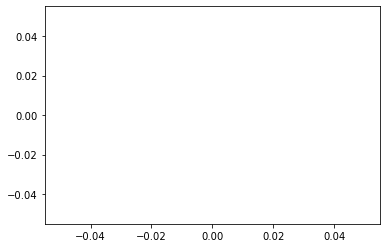

In [32]:
plt.plot(adaline_model.errors)
plt.show()